In [2]:
# import block 
import pandas as pd
import numpy as np

# plotting
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn import metrics

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

from sklearn.manifold import TSNE

import umap

import time

In [3]:
# load data 
# shape is (801, 20532) and first column is sample_n - I don't think we want this I think we just want the gene expression 
rnaSeqDf = pd.read_csv('/Users/peytonhall/downloads/data.csv')
print(rnaSeqDf)

     Unnamed: 0  gene_0    gene_1    gene_2    gene_3     gene_4  gene_5  \
0      sample_0     0.0  2.017209  3.265527  5.478487  10.431999     0.0   
1      sample_1     0.0  0.592732  1.588421  7.586157   9.623011     0.0   
2      sample_2     0.0  3.511759  4.327199  6.881787   9.870730     0.0   
3      sample_3     0.0  3.663618  4.507649  6.659068  10.196184     0.0   
4      sample_4     0.0  2.655741  2.821547  6.539454   9.738265     0.0   
..          ...     ...       ...       ...       ...        ...     ...   
796  sample_796     0.0  1.865642  2.718197  7.350099  10.006003     0.0   
797  sample_797     0.0  3.942955  4.453807  6.346597  10.056868     0.0   
798  sample_798     0.0  3.249582  3.707492  8.185901   9.504082     0.0   
799  sample_799     0.0  2.590339  2.787976  7.318624   9.987136     0.0   
800  sample_800     0.0  2.325242  3.805932  6.530246   9.560367     0.0   

       gene_6    gene_7  gene_8  ...  gene_20521  gene_20522  gene_20523  \
0    7.1751

In [59]:
# this should only be the gene expression without the sample_n
# shape is (801, 20531)
geneExpression = rnaSeqDf.iloc[:,1:]

# Rows represent samples (or cells).
# Columns represent genes.

In [60]:
# get class labels for each sample
# shape is (801, 2)
labelData = pd.read_csv('/Users/peytonhall/downloads/labels.csv')

In [61]:
# i think we just want the classes
# shape is (801, 1)

labels = labelData.iloc[:,1:]
print(labels)

    Class
0    PRAD
1    LUAD
2    PRAD
3    PRAD
4    BRCA
..    ...
796  BRCA
797  LUAD
798  COAD
799  PRAD
800  PRAD

[801 rows x 1 columns]


Part 1: PCA Analysis

In [63]:
# standardize data 
scaler = StandardScaler()
scaledData = scaler.fit_transform(geneExpression)

scaledData = np.array(scaledData)

# shape is (801, 20531)
print(scaledData.shape)

(801, 20531)


Premise of PCA is to reduce the dimensionality of a data set by finding a new set of variables, 
smaller than the original set of variables, retaining most of the sample’s information.

1. Apply PCA: Use Principal Component Analysis (PCA) to reduce the full RNA-seq
dataset to 10 components. Record the time taken for this transformation. [0.4pt]


ANSWER: time is 5.940980911254883
* this is my second time running

In [64]:
# start the timing
startTime = time.time()

# initialize PCA with 10 components
pca = PCA(n_components=10)
gene_expression_pca = pca.fit_transform(scaledData)

# end timing
endTime = time.time()
totalTime = endTime - startTime

In [65]:
print(totalTime)

5.940980911254883


2. Visualize the First Two Components: Plot the first two principal components to
visualize any potential clusters. Color each point according to the Class column from
labels.csv to observe whether specific classes form distinct clusters. [0.4pt]

ANSWER: The only class that seemed to form a distinct cluster was KIRC. The rest did form clear clusters, but they
all had strong overlap. 


In [66]:
# pca result to dataframe
gene_expression_pca_df = pd.DataFrame(gene_expression_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10'])

# make class column in gene expression pca dataframe
gene_expression_pca_df['Class'] = labels

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

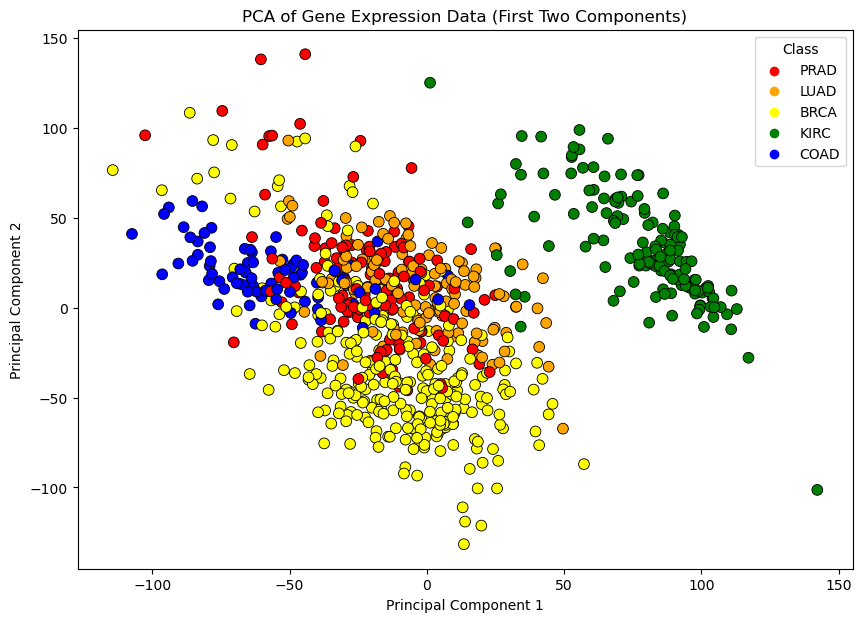

In [67]:
# plot 
plt.figure(figsize=(10, 7))
sns.scatterplot(
    x='PC1', 
    y='PC2', 
    hue='Class', 
    data=gene_expression_pca_df, 
    palette=['red', 'orange', 'yellow', 'green', 'blue'],
    s=60, 
    edgecolor='k'
)

plt.title('PCA of Gene Expression Data (First Two Components)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Class')
plt.show()

3. Evaluate with Silhouette Score: Calculate the silhouette score using the 2D PCA
projection and the true labels to evaluate how well-separated the data points are in the
reduced space. What is the silhouette score for the 2D PCA projection? [0.4pt]

ANSWER:
The silhouette score for the 2D PCA projection is 0.1471892881232607. This indicates the clusters overlap 
or have poor separation. 


In [68]:
# Use only the first two PCA components for the silhouette score calculation
pca2d = gene_expression_pca_df[['PC1', 'PC2']]

# Calculate the silhouette score using the 2D PCA projection and true labels
silScore = silhouette_score(pca2d, labels['Class'])

print(silScore)

0.1471892881232607


4. Analyze Explained Variance: Plot the cumulative explained variance for the first 10
components to see how much information is retained with each added component.
[0.4pt]


ANSWER: 
The plot provides insight into how much of the original dataset's variability is captured by the first few 
principal components (PCs), indicating that half of the variance was captured.

The most variance is retained from 1 to 2 components, with a cumulative explained variance of 0.20. There is a 
steady decrease in the ratio of this variance as the number of components increases. 

However overall, the cumulative variance increases as components increases. 


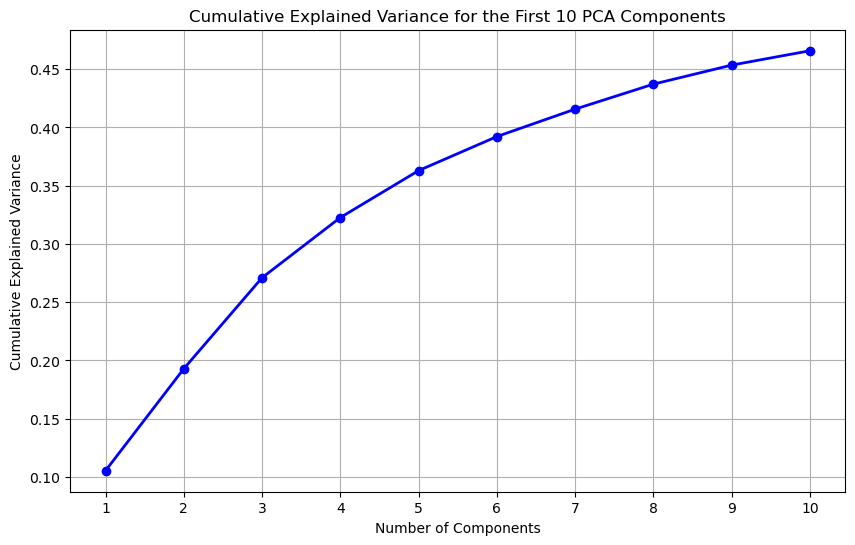

In [69]:
# access the explained variance ratio from PCA
explainVR = pca.explained_variance_ratio_

# get cumulative explained variance
cev = np.cumsum(explainVR[:10])

# plot the cumulative explained variance
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), cev, marker='o', color='b', linestyle='-', linewidth=2)
plt.title('Cumulative Explained Variance for the First 10 PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

5. Variance Explained: What percentage of variance is explained by the first two
components? How many components are needed to explain at least 80% of the
variance?

ANSWER:
19.294013819924224% of variance is explained by the first two components. One component is needed to explain at least 80% of the data.

In [70]:
# percentage of variance explained by the first two components
var2comp = np.sum(explainVR[:2]) * 100
print(var2comp)

19.294013819924224


In [75]:
# this is NOT close to 80 
# I'm going to accumulate the explained variance until it reaches 80%

cumulativeVar = np.cumsum(explainVR)
components80 = np.argmax(cumulativeVar >= 0.80) + 1 
# should be the ind of the first component where the cumulative explained 
# variance reaches or exceeds 80%

print(components80)

1


Part 2: t-SNE Analysis

1. Apply t-SNE:
○ Use t-SNE to reduce the RNA-seq dataset to 2 dimensions. Experiment with
different parameter configurations: [0.5pt]
    i. Perplexity: Try values such as 5, 30, and 50.
    ii. Learning Rate: Test values such as 10, 100, and 500.
○ Record the time taken for each t-SNE transformation.

ANSWER:
For each transformation here's the times for 2 components:
Perplexity 5:
    Learning Rate 10:
    6.115865230560303
    
    Learning Rate 100:
    6.089757204055786
    
    Learning Rate 500:
    6.550307989120483

Perplexity 30:
    Learning Rate 10:
    6.600692987442017
    
    Learning Rate 100:
    6.900825023651123
    
    Learning Rate 500:
    6.988800764083862

Perplexity 50:
    Learning Rate 10:
    7.113161087036133
    
    Learning Rate 100:
    7.205176115036011
    
    Learning Rate 500:
    7.45085883140564

In [107]:
perplexity = [5, 30, 50]
learningRate = [10, 100, 500]


tsneResults = []
# loop through combinations of perplexity and learning rate
for perp in perplexity:
    for learn in learningRate:
        
        # start timing
        start = time.time()
        
        # initialize t-SNE with current perplexity and learning rate
        tsne = TSNE(perplexity=perp, learning_rate=learn, n_components=2)
        
        # fit and transform the scaled gene expression data
        tsne_data = tsne.fit_transform(scaledData) 
        
        # end timing
        end = time.time()
        
        # total t-SNE time
        timeTotal = end - start
        
        silhouette = silhouette_score(tsne_data, labels['Class'])
        
        # store results as tuple
        tsneResults.append((perp, learn, time, silhouette, tsne_data))

# convert to df with cols to index later        
tsneDf = pd.DataFrame(tsneResults, columns=['Perplexity', 'Learning Rate', 'time', 'Silhouette Score', 't-SNE Data'])

2. Visualize Results: [0.5pt]
○ Create scatter plots of the t-SNE results for each configuration. Color each point
by its Class label from labels.csv to observe any clustering patterns

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

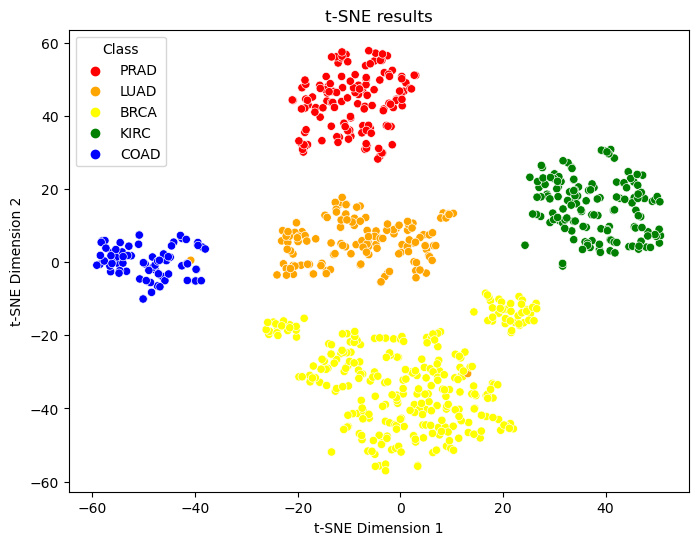

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

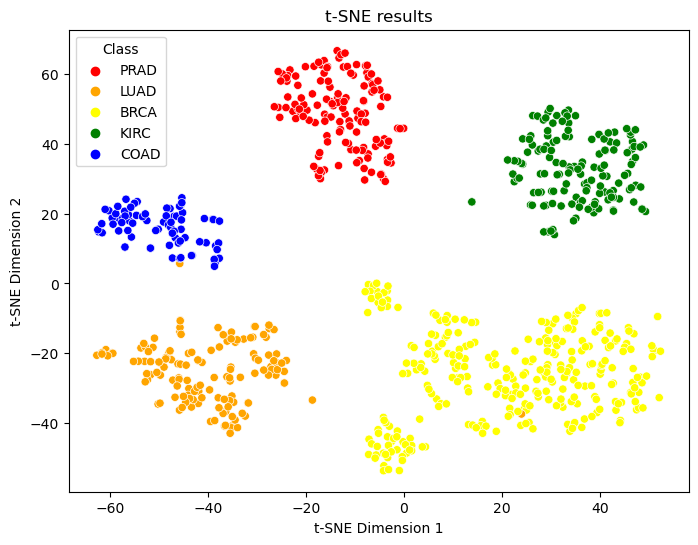

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

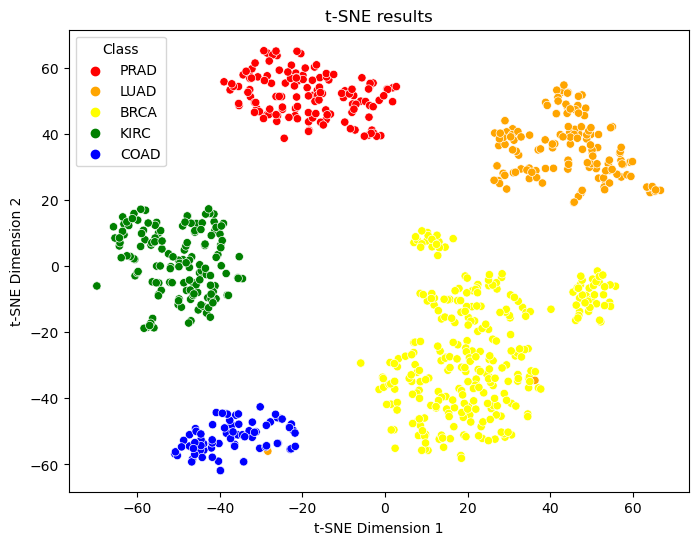

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

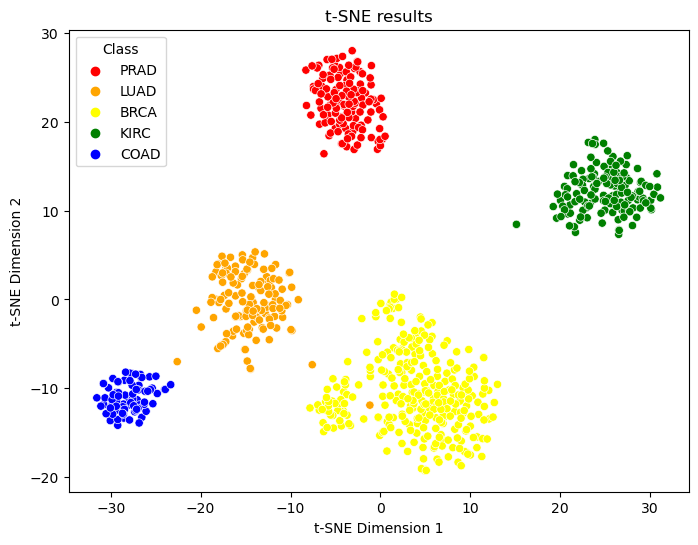

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

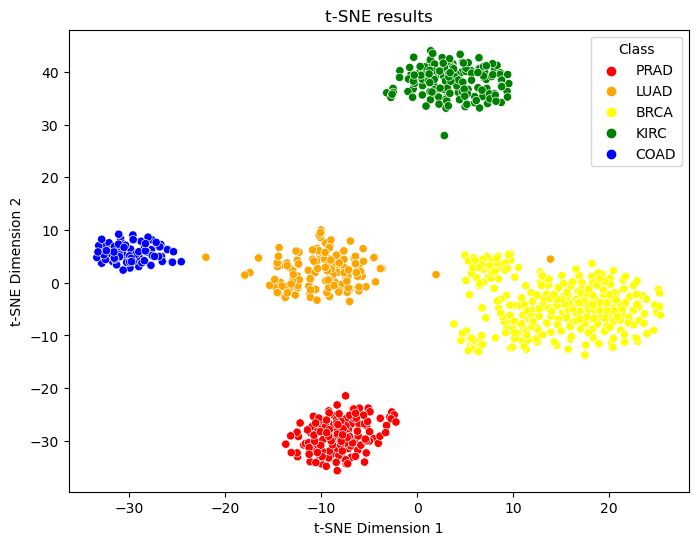

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

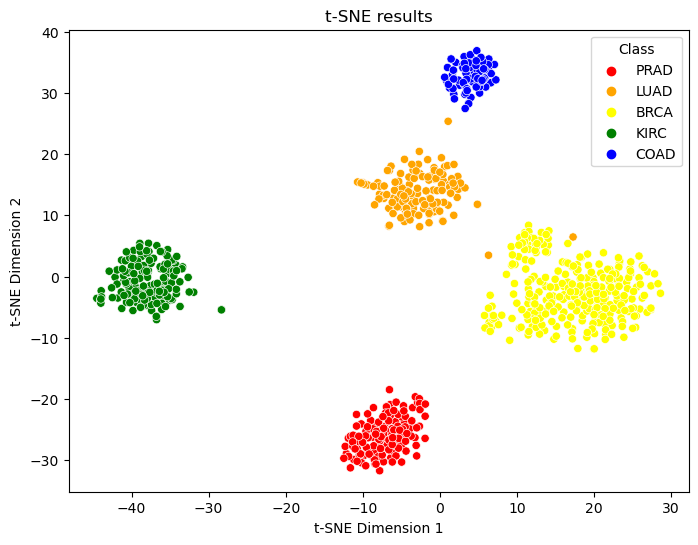

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

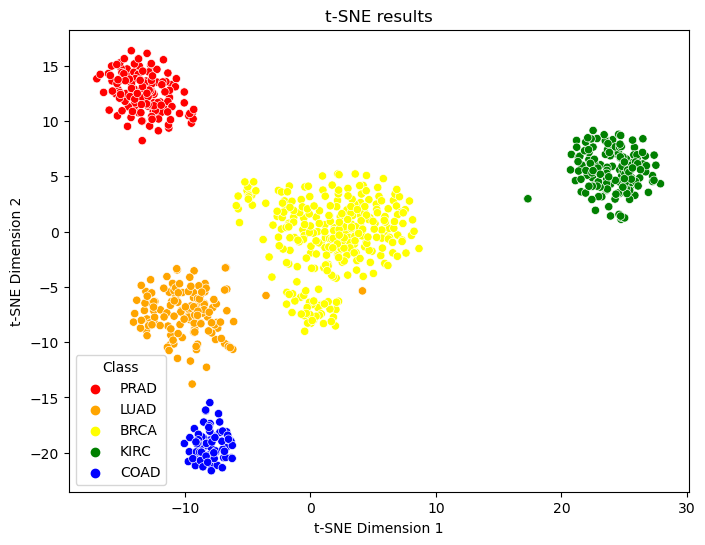

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

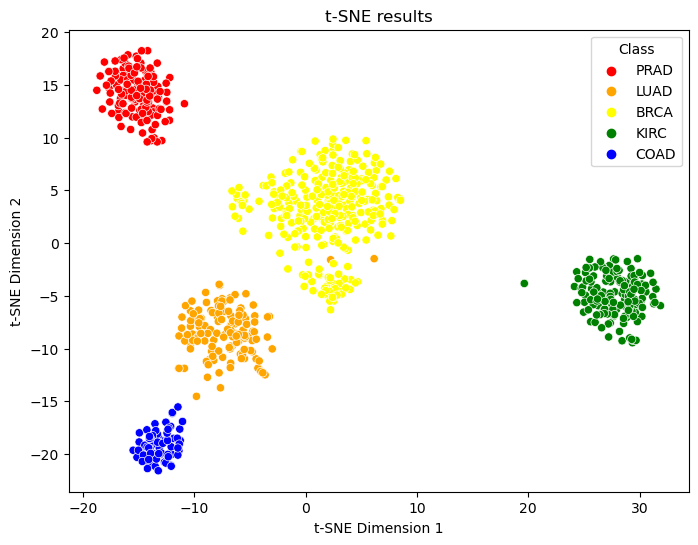

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

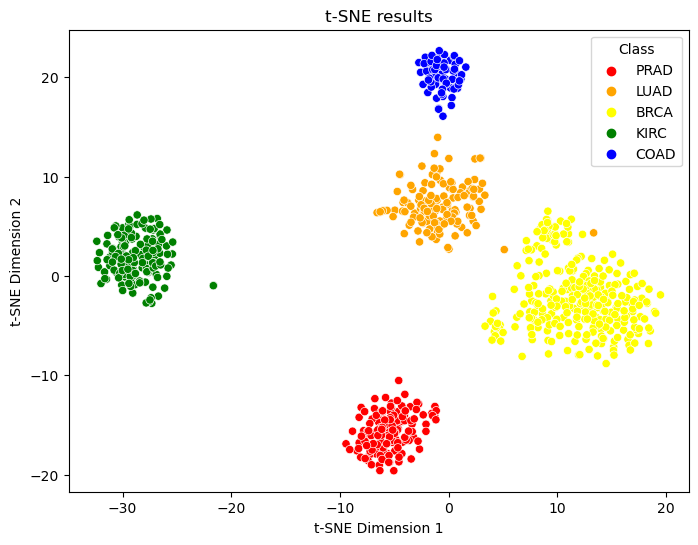

In [88]:
# plot t-SNE results for each configuration
for index, row in tsneDf.iterrows():
    tsne_data = row['t-SNE Data']
    
    # DataFrame
    tsne_df = pd.DataFrame(tsne_data, columns=['TSNE1', 'TSNE2'])
    tsne_df['Class'] = labels['Class']
    
    # plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='TSNE1', y='TSNE2', hue='Class', 
        palette=['red', 'orange', 'yellow', 'green', 'blue'], 
        data=tsne_df
    )
    plt.title("t-SNE results")
    plt.xlabel('t-SNE Dimension 1')
    plt.ylabel('t-SNE Dimension 2')
    plt.legend(title='Class')
    plt.show()

3. Evaluate with Silhouette Score: [0.5pt]
○ For each t-SNE configuration, calculate the silhouette score to evaluate how
well the data points are grouped based on their distance from points in the same
cluster versus those in other clusters.

ANSWER:
Silhouette score for each configuration:
Perplexity 5:
    Learning Rate 10:
    0.577191
    
    Learning Rate 100:
    0.595407
    
    Learning Rate 500:
    0.613660

Perplexity 30:
    Learning Rate 10:
    0.713418
    
    Learning Rate 100:
    0.733144
    
    Learning Rate 500: * this seems to have clustered the best
    0.742748

Perplexity 50:
    Learning Rate 10:
    0.706420
    
    Learning Rate 100:
    0.708526
    
    Learning Rate 500:
    0.724026

In [87]:
print(tsneDf['Silhouette Score'])

0    0.577191
1    0.595407
2    0.613660
3    0.713418
4    0.733144
5    0.742748
6    0.706420
7    0.708526
8    0.724026
Name: Silhouette Score, dtype: float32


4. Discussions: [0.5pt]
○ How do changes in perplexity and learning rate impact the clustering structure
and time taken?
○ Which parameter configuration achieves the highest silhouette score?


ANSWER: As perplexity and learning rate increases, the time increases. The clustering structure
also seems to improve as learning rate increases. The clustering structure clearly improves
as perplexity increases from 5 to 30. There's less of a change from 30 to 50. 


As learning rate increases, this seems to improve clustering distinction overall. However, it
seems that over-perplexing may have adverse affects on clustering since the silhoute score 
decreased slightly when the perplexity increased from 30 to 50. 


This suggests that the optimal clustering occurs at the highest learning rate with 
a moderately high perplexity that may depend on other factors. 


Part 3: UMAP Analysis

1. Apply UMAP: [0.5pt]
○ Use UMAP to reduce the RNA-seq dataset to 2 dimensions. Experiment with
the following values:
i. n_neighbors: 5, 15, and 30
ii. min_dist: 0.1, 0.5, and 0.9
○ This results in a total of 9 configurations. Apply UMAP for each combination
and record the time taken for each transformation.

ANSWER:
Time for each transformation:
5 neighbors and 0.1 distance
8.396213

5 neighbors and 0.5 distance
4.746067

5 neighbors and 0.9 distance
4.327687

15 neighbors and 0.1 distance
4.448575

15 neighbors and 0.5 distance
4.518416

15 neighbors and 0.9 distance
4.948099

30 neighbors and 0.1 distance
4.578064

30 neighbors and 0.5 distance
4.625355

30 neighbors and 0.9 distance
4.833541


In [98]:
n_neighbors = [5,15,30]
min_dist = [0.1,0.5,0.9]


umapOutput = []
for neighbor in n_neighbors:
    for dist in min_dist:
        
        timeStart = time.time()
        
        # initialize UMAP with n_neighbors and min_dist
        umapModel = umap.UMAP(n_neighbors=neighbor, min_dist=dist, n_components=2)
        
        umapData = umapModel.fit_transform(scaledData);
        
        timeEnd = time.time()
        
        umapTime = timeEnd-timeStart
        
        umapSilhouette = silhouette_score(umapData, labels['Class'])
        
        umapOutput.append((neighbor,dist,umapTime, umapSilhouette,umapData))

# convert output to dataframe for later use

umapDf = pd.DataFrame(umapOutput, columns=['n_neighbor', 'dist', 'time', 'umap_silhouette','umap_data'])

In [95]:
# this took long
print(umapDf['time'])

0    8.396213
1    4.746067
2    4.327687
3    4.448575
4    4.518416
5    4.948099
6    4.578064
7    4.625355
8    4.833541
Name: time, dtype: float64


2. Visualize Results: For each configuration, create a scatter plot of the 2D UMAP results,
coloring each point by its Class label from labels.csv to observe any clustering
pattern [0.5pt]


/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

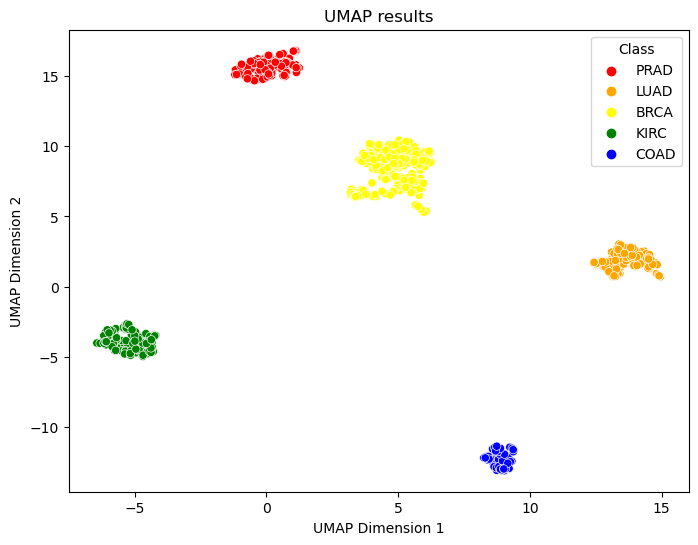

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

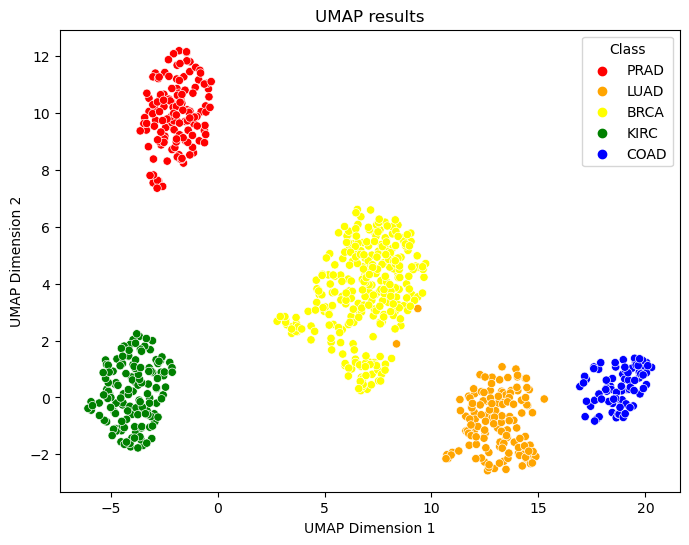

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

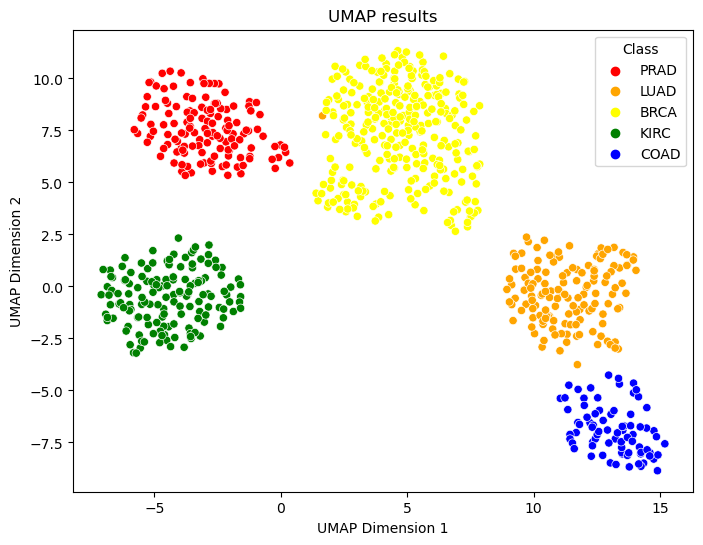

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

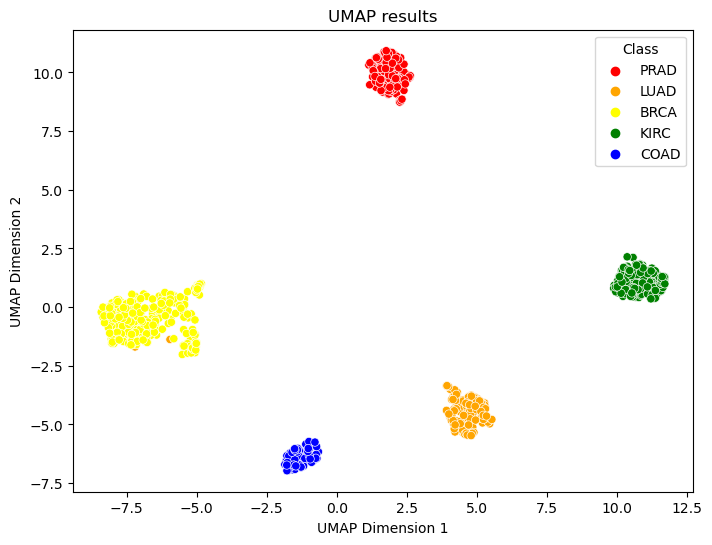

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

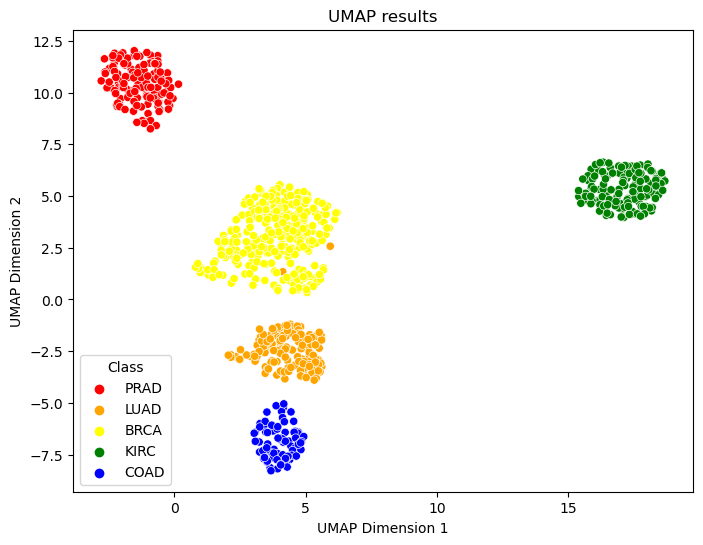

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

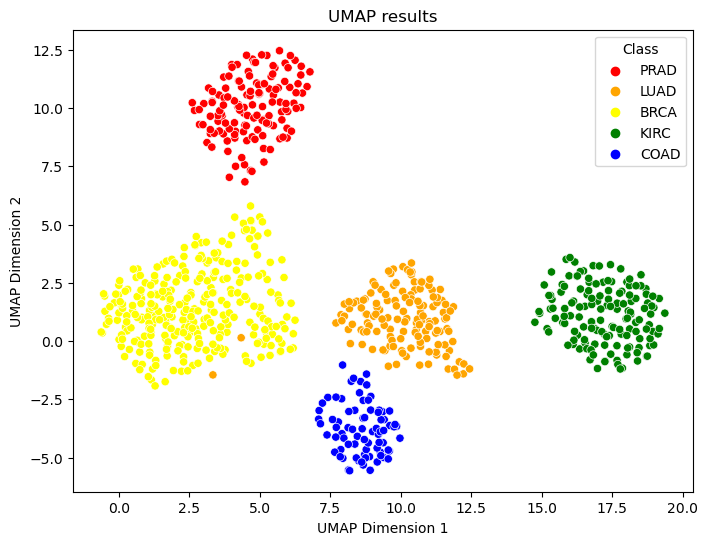

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

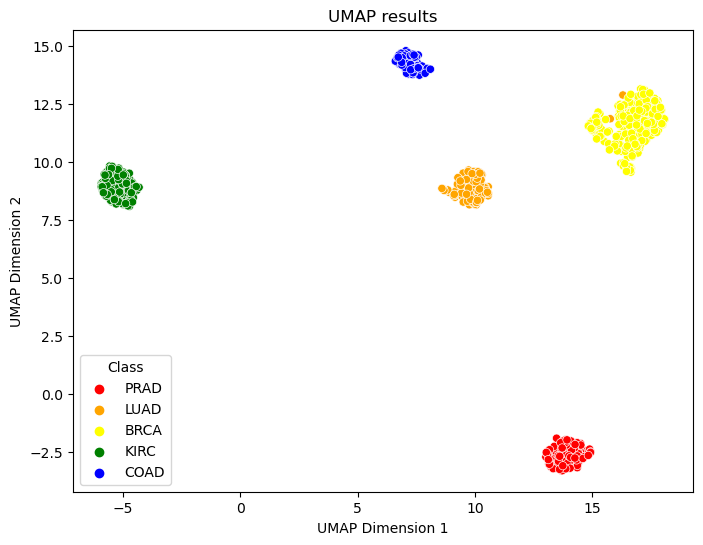

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

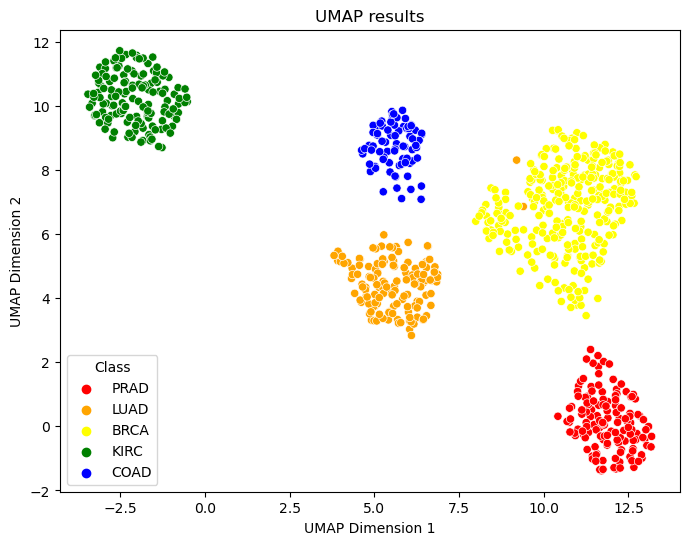

/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/peytonhall/miniconda3/envs/qbio_490_pbhall/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categ

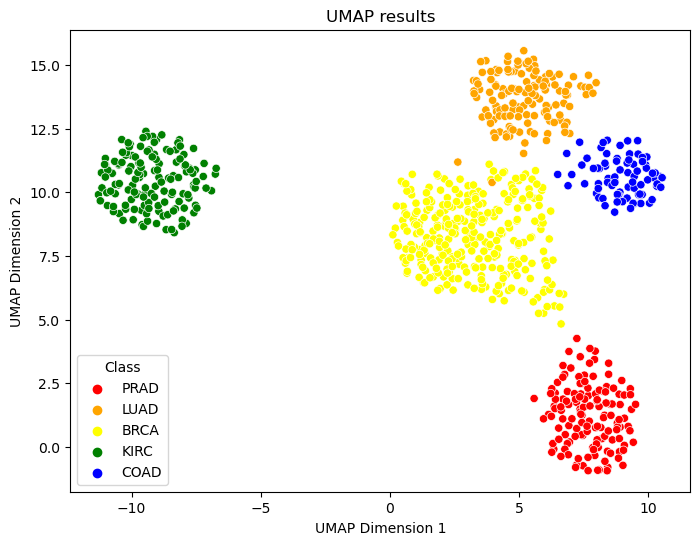

In [99]:
# plot t-SNE results for each configuration
for index, row in umapDf.iterrows():
    umap_data = row['umap_data']
    
    # Create DataFrame for plotting
    umap_df = pd.DataFrame(umap_data, columns=['UMAP1', 'UMAP2'])
    umap_df['Class'] = labels['Class']
    
    # Plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(
        x='UMAP1', y='UMAP2', hue='Class', 
        palette=['red', 'orange', 'yellow', 'green', 'blue'], 
        data=umap_df
    )
    plt.title("UMAP results")
    plt.xlabel('UMAP Dimension 1')
    plt.ylabel('UMAP Dimension 2')
    plt.legend(title='Class')
    plt.show()

In [101]:
print(umapDf['umap_silhouette'])

0    0.852054
1    0.723442
2    0.609578
3    0.851346
4    0.701224
5    0.632809
6    0.866675
7    0.687815
8    0.635265
Name: umap_silhouette, dtype: float32


3. Evaluate with Silhouette Score:
○ Calculate the silhouette score for each UMAP projection to evaluate the
clustering quality. The silhouette score will help determine how well-separated
the clusters are in the UMAP results. [0.5pt]

ANSWER:
Silhouette score for each UMAP projection:
5 neighbors and 0.1 distance
0.852054

5 neighbors and 0.5 distance
0.723442

5 neighbors and 0.9 distance
0.609578

15 neighbors and 0.1 distance
0.851346

15 neighbors and 0.5 distance
0.701224

15 neighbors and 0.9 distance
0.632809

30 neighbors and 0.1 distance * this performed the best
0.866675

30 neighbors and 0.5 distance
0.687815

30 neighbors and 0.9 distance
0.635265


4. Questions: [0.5pt]
○ How do changes in n_neighbors and min_dist impact the clustering structure
and time taken for UMAP?
○ Which UMAP configuration achieves the highest silhouette score?


ANSWER:
As n_neighbors increases, so does the time taken for UMAP. However min_distance is 
more inversely rwlated to silhouette score, as the lowest distance seemed to have the highest score, and so, perform the best. 

Part 4: Comparative Analysis of PCA, t-SNE, and UMAP

1. Summarize Results:
○ Create a table summarizing the silhouette scores and time taken for each
configuration of PCA, t-SNE, and UMAP. Include the best configurations based
on silhouette score from each method for easy comparison. [0.5pt]

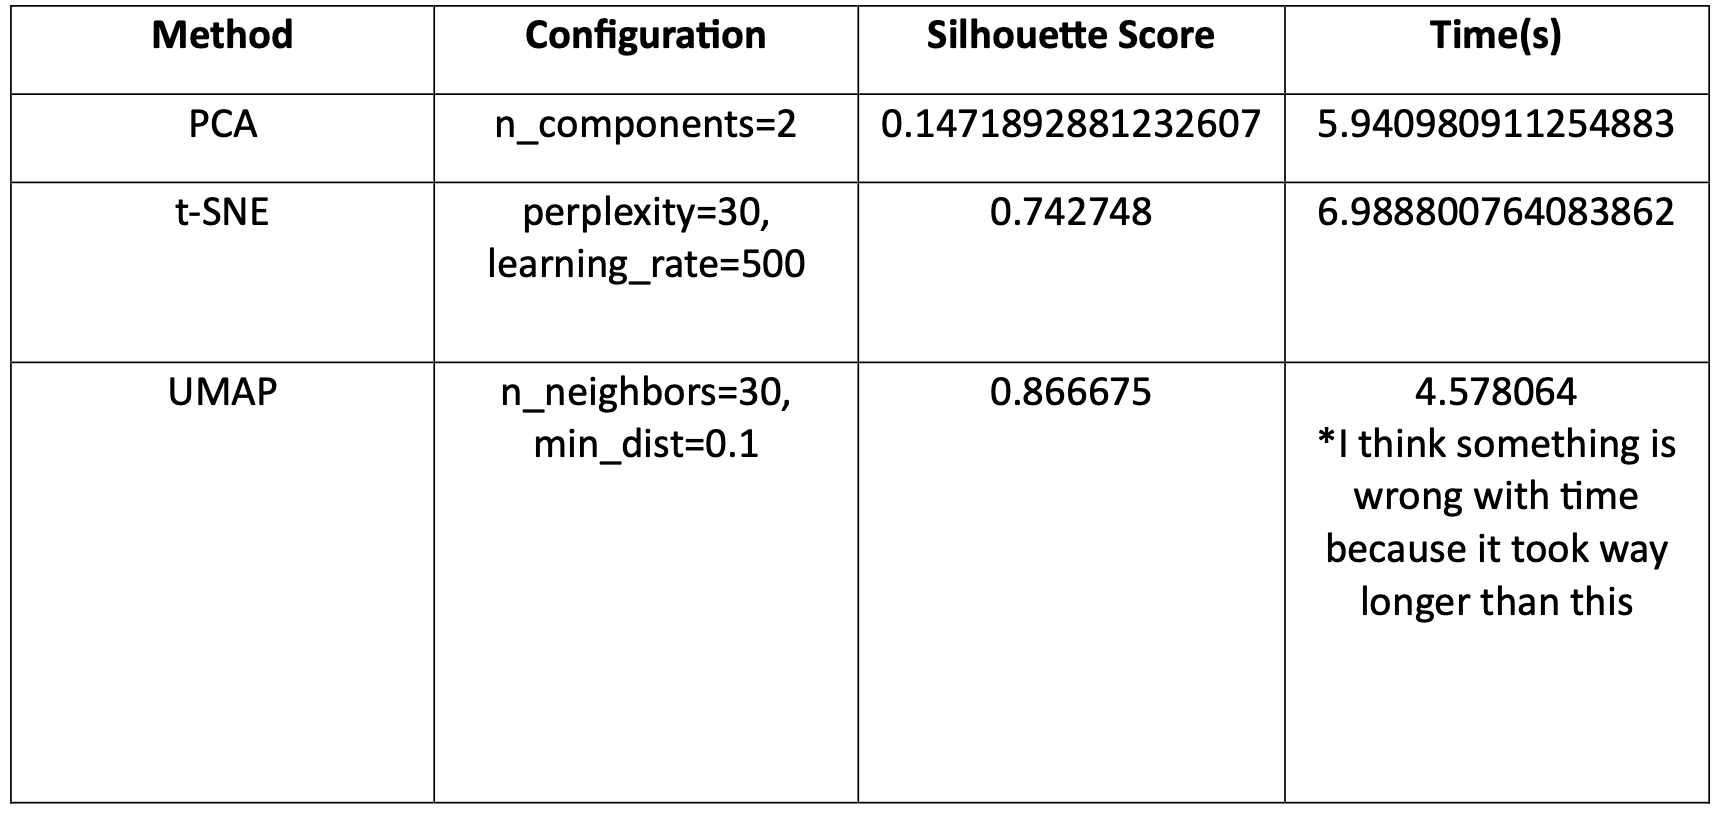

3. Compare Computational Efficiency: Analyze the time taken by each method and
configuration. Which method is the most efficient, and which is the slowest? How does
computation time change with different parameter settings for t-SNE and UMAP? [0.5pt]


ANSWER: Although UMAP's time said it was lower than PCA's, I observed it to be 
dramatically longer. UMAP was by far the slowest, while PCA was the most 
efficient regarding time. For UMAP and t-SNE, computation time increases as the complexity
of the parameters increases.

4. Evaluate Clustering Quality: Compare the silhouette scores for PCA, t-SNE, and
UMAP. Which method produced the best clustering quality? Are there configurations that
show a significant improvement in clustering separation? [0.5pt]


UMAP produced the best clustering quality. Overall, the shortest min_distance performed 
better, but n_neighbors of 30 showed significant improvement in clustering separation.
This method and configuration combination showed a silhouette of 0.866675, suggesting 
good clustering. 

5. Which dimensionality reduction method produced the highest silhouette score, indicating
the best clustering quality? How does each method’s computational cost (time taken)
compare, and what trade-offs do you observe between clustering quality and
computation time? [0.5pt]


The UMAP produced the highest silhouette score and so, had the best clustering quality.
HOWEVER, this was much more computationally expensive and this shows a clear trade-off
between clustering quality and computation time. 